In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

print(mpl.__version__)
print(torch.__version__)

3.5.1
1.10.2


In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


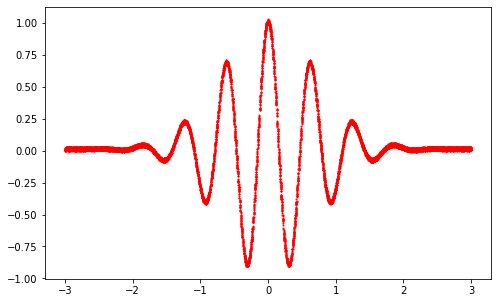

In [30]:
n_data = 10000
x_numpy = np.random.rand(n_data, 1) * 6 - 3 
y_numpy = np.exp(-(x_numpy**2))*np.cos(10*x_numpy) + 3e-2*np.random.rand(n_data, 1)

plt.figure(figsize=(8, 5))
plt.plot(x_numpy, y_numpy, 'r.', ms=2)
plt.show()

x_torch = torch.Tensor(x_numpy).to(device)
y_torch = torch.Tensor(y_numpy).to(device)

In [10]:
# models

class Model(nn.Module):
    def __init__(self, name='mlp', xdim=1, hdims=[16, 16], ydim=1):
        super(Model, self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdims = hdims
        self.ydim = ydim
        
        self.layers = []
        prev_hdim = self.xdim
        for hdim in self.hdims:
            self.layers.append(nn.Linear(prev_hdim, hdim, bias=True))
            self.layers.append(nn.Tanh())
            prev_hdim = hdim
            
        self.layers.append(nn.Linear(prev_hdim, self.ydim, bias=True))
        
        self.net = nn.Sequential()
        for l_idx, layer in enumerate(self.layers):
            layer_name = type(layer).__name__ + str(l_idx)
            self.net.add_module(layer_name, layer)
            
        self.init_param()
        
    def init_param(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        return self.net(x)
        
model_sgd = Model(name='mlp_sgd', xdim=1, hdims=[64, 64], ydim=1).to(device)
model_momentum = Model(name='mlp_momentum', xdim=1, hdims=[64, 64], ydim=1).to(device)
model_adam = Model(name='mlp_adam', xdim=1, hdims=[64, 64], ydim=1).to(device)

In [15]:
# check parameters

n_param = 0

for param_name, param in model_sgd.named_parameters():

    n_param += len(param.reshape(-1))
    
    print(param_name, param.shape)
    print(param)
    print()

print(f'Total number of parameters: {n_param}')

net.Linear0.weight torch.Size([64, 1])
Parameter containing:
tensor([[ 0.4025],
        [-0.4108],
        [-0.7577],
        [-0.5805],
        [ 0.6686],
        [ 0.0450],
        [ 1.2525],
        [-1.5193],
        [ 0.6917],
        [ 3.4316],
        [-0.8352],
        [-0.8086],
        [ 2.1279],
        [-0.1468],
        [ 2.1862],
        [ 0.4984],
        [ 0.4721],
        [ 1.0412],
        [ 0.1646],
        [ 0.4777],
        [-1.9792],
        [-0.8852],
        [-2.3045],
        [ 0.6962],
        [ 1.2547],
        [-1.5093],
        [-1.7103],
        [-0.6785],
        [ 3.0838],
        [-1.2990],
        [ 1.3998],
        [-0.8197],
        [ 2.4671],
        [ 1.2758],
        [ 0.3414],
        [ 0.9160],
        [-1.4238],
        [-1.1596],
        [-0.2154],
        [-0.1964],
        [-0.5674],
        [-1.0847],
        [ 1.2848],
        [-2.1381],
        [-0.8031],
        [-1.7954],
        [-0.9113],
        [-0.5292],
        [ 0.1456],
        

In [16]:
model_sgd

Model(
  (net): Sequential(
    (Linear0): Linear(in_features=1, out_features=64, bias=True)
    (Tanh1): Tanh()
    (Linear2): Linear(in_features=64, out_features=64, bias=True)
    (Tanh3): Tanh()
    (Linear4): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [17]:
list(model_sgd.named_parameters())

[('net.Linear0.weight',
  Parameter containing:
  tensor([[ 0.4025],
          [-0.4108],
          [-0.7577],
          [-0.5805],
          [ 0.6686],
          [ 0.0450],
          [ 1.2525],
          [-1.5193],
          [ 0.6917],
          [ 3.4316],
          [-0.8352],
          [-0.8086],
          [ 2.1279],
          [-0.1468],
          [ 2.1862],
          [ 0.4984],
          [ 0.4721],
          [ 1.0412],
          [ 0.1646],
          [ 0.4777],
          [-1.9792],
          [-0.8852],
          [-2.3045],
          [ 0.6962],
          [ 1.2547],
          [-1.5093],
          [-1.7103],
          [-0.6785],
          [ 3.0838],
          [-1.2990],
          [ 1.3998],
          [-0.8197],
          [ 2.4671],
          [ 1.2758],
          [ 0.3414],
          [ 0.9160],
          [-1.4238],
          [-1.1596],
          [-0.2154],
          [-0.1964],
          [-0.5674],
          [-1.0847],
          [ 1.2848],
          [-2.1381],
          [-0.8031],
       

In [23]:
model_sgd.net.Linear0

Linear(in_features=1, out_features=64, bias=True)

In [24]:
model_sgd.net.Linear0.weight

Parameter containing:
tensor([[ 0.4025],
        [-0.4108],
        [-0.7577],
        [-0.5805],
        [ 0.6686],
        [ 0.0450],
        [ 1.2525],
        [-1.5193],
        [ 0.6917],
        [ 3.4316],
        [-0.8352],
        [-0.8086],
        [ 2.1279],
        [-0.1468],
        [ 2.1862],
        [ 0.4984],
        [ 0.4721],
        [ 1.0412],
        [ 0.1646],
        [ 0.4777],
        [-1.9792],
        [-0.8852],
        [-2.3045],
        [ 0.6962],
        [ 1.2547],
        [-1.5093],
        [-1.7103],
        [-0.6785],
        [ 3.0838],
        [-1.2990],
        [ 1.3998],
        [-0.8197],
        [ 2.4671],
        [ 1.2758],
        [ 0.3414],
        [ 0.9160],
        [-1.4238],
        [-1.1596],
        [-0.2154],
        [-0.1964],
        [-0.5674],
        [-1.0847],
        [ 1.2848],
        [-2.1381],
        [-0.8031],
        [-1.7954],
        [-0.9113],
        [-0.5292],
        [ 0.1456],
        [-0.3527],
        [-0.7874],
        [

In [26]:
model_sgd.net.Linear0.weight.grad

In [27]:
# optimizers

LEARNING_RATE = 1e-2

loss = nn.MSELoss()

optm_sgd = optim.SGD(model_sgd.parameters(), lr=LEARNING_RATE)
optm_momentum = optim.SGD(model_momentum.parameters(), lr=LEARNING_RATE, momentum=0.9)
optm_adam = optim.Adam(model_adam.parameters(), lr=LEARNING_RATE)


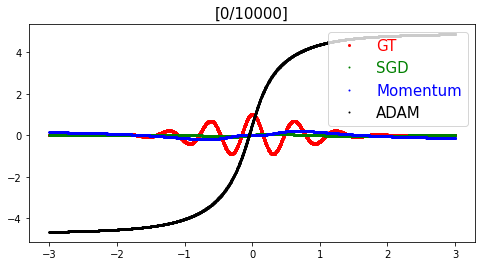

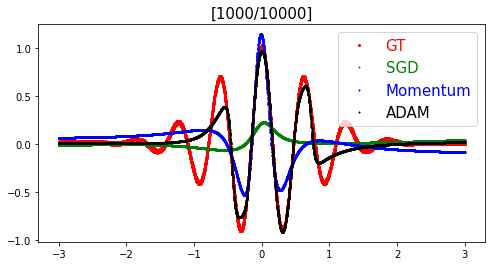

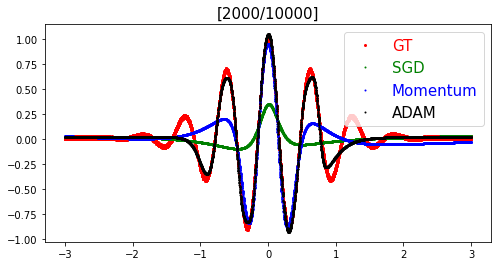

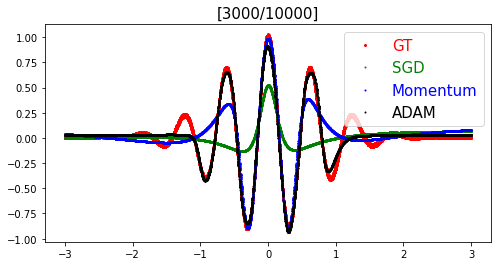

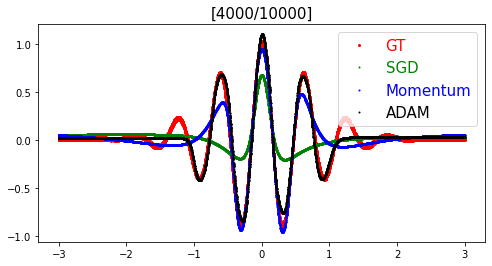

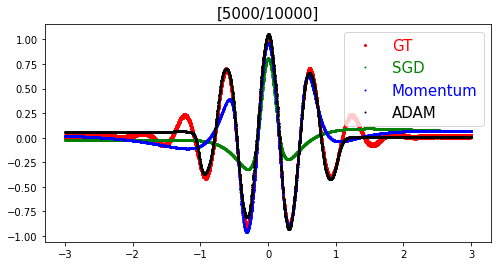

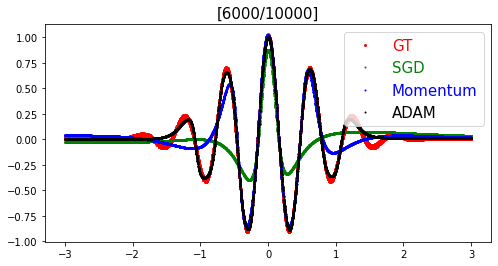

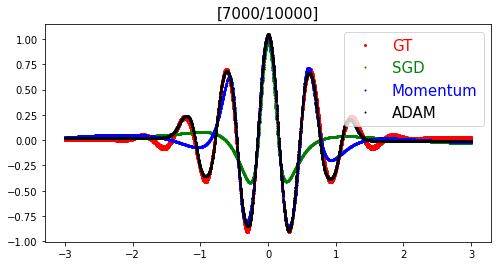

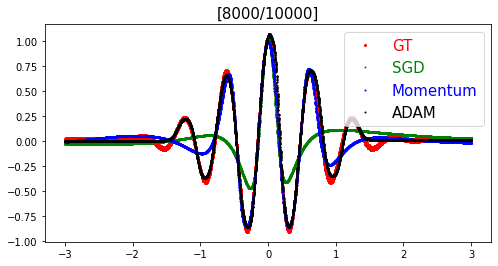

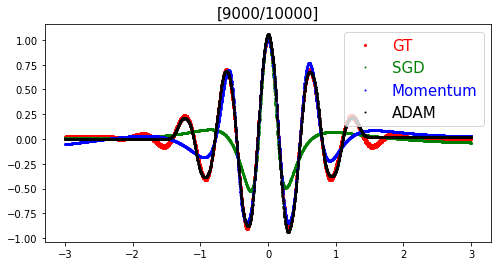

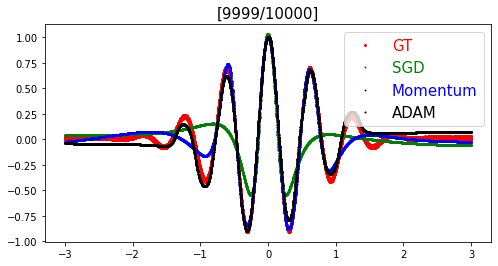

In [34]:
# train

MAX_ITER = 1e4
BATCH_SIZE = 64
PLOT_EVERY = 1000

model_sgd.init_param()
model_momentum.init_param()
model_adam.init_param()

model_sgd.train()
model_momentum.train()
model_adam.train()

for it in range(int(MAX_ITER)):
    
    r_idx = np.random.permutation(n_data)[:BATCH_SIZE]
    batch_x = x_torch[r_idx]
    batch_y = y_torch[r_idx]
    
    # SGD
    y_pred_sgd = model_sgd.forward(batch_x)
    loss_sgd = loss(y_pred_sgd, batch_y)
    optm_sgd.zero_grad()
    loss_sgd.backward()
    optm_sgd.step()
    
    # Momentum
    y_pred_momentum = model_momentum.forward(batch_x)
    loss_momentum = loss(y_pred_momentum, batch_y)
    optm_momentum.zero_grad()
    loss_momentum.backward()
    optm_momentum.step()
    
    # Adam
    y_pred_adam = model_adam.forward(batch_x)
    loss_adam = loss(y_pred_adam, batch_y)
    optm_adam.zero_grad()
    loss_adam.backward()
    optm_adam.step()
    
    if (it==0) or ((it%PLOT_EVERY)==0) or (it==(MAX_ITER-1)):
        with torch.no_grad():
            y_sgd_numpy = model_sgd.forward(x_torch).cpu().detach().numpy()
            y_momentum_numpy = model_momentum.forward(x_torch).cpu().detach().numpy()
            y_adam_numpy = model_adam.forward(x_torch).cpu().detach().numpy()
            
            plt.figure(figsize=(8, 4))
            plt.plot(x_numpy, y_numpy, 'r.', ms=4, label='GT')
            plt.plot(x_numpy, y_sgd_numpy, 'g.', ms=2, label='SGD')
            plt.plot(x_numpy, y_momentum_numpy, 'b.', ms=2, label='Momentum')
            plt.plot(x_numpy, y_adam_numpy, 'k.', ms=2, label='ADAM')
            plt.title(f'[{it}/{int(MAX_ITER)}]', fontsize=15)
            plt.legend(labelcolor='linecolor', loc='upper right', fontsize=15)
            plt.show()
